In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("bank_marketing_part1_data.csv")

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
df.shape

(210, 7)

Outlier Treatment¶
To check for outliers, we will be plotting the box plots.

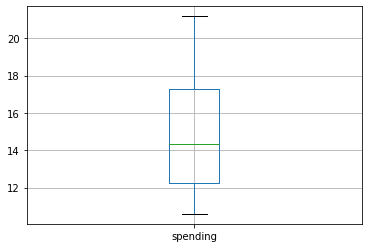

In [6]:
df.boxplot(column=['spending'])
plt.show()

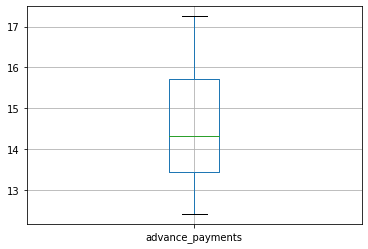

In [7]:
df.boxplot(column=['advance_payments'])
plt.show()

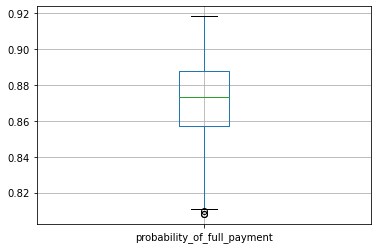

In [8]:
df.boxplot(column=['probability_of_full_payment'])
plt.show()

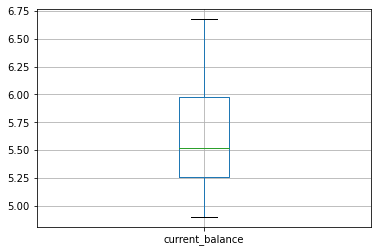

In [9]:
df.boxplot(column=['current_balance'])
plt.show()

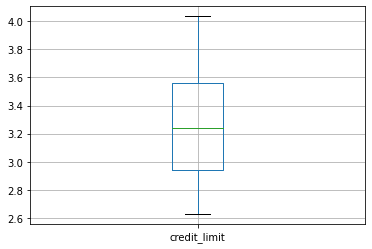

In [10]:
df.boxplot(column=['credit_limit'])
plt.show()

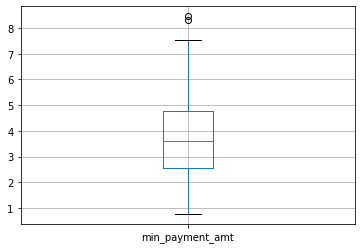

In [11]:
df.boxplot(column=['min_payment_amt'])
plt.show()

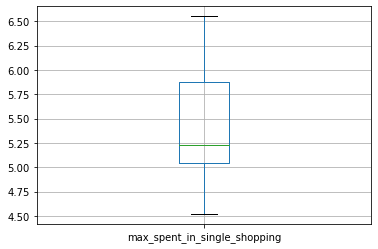

In [12]:
df.boxplot(column=['max_spent_in_single_shopping'])
plt.show()

In [13]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [14]:
lrprobability,urprobability=remove_outlier(df['probability_of_full_payment'])
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']>urprobability,urprobability,df['probability_of_full_payment'])
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']<lrprobability,lrprobability,df['probability_of_full_payment'])


lrmin,urmin=remove_outlier(df['min_payment_amt'])
df['min_payment_amt']=np.where(df['min_payment_amt']>urmin,urmin,df['min_payment_amt'])
df['min_payment_amt']=np.where(df['min_payment_amt']<lrmin,lrmin,df['min_payment_amt'])

df.shape

(210, 7)

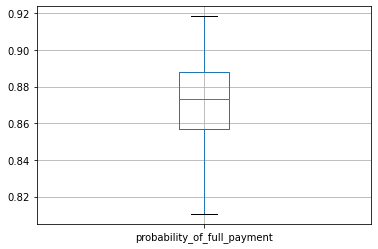

In [15]:
df.boxplot(column=['probability_of_full_payment'])
plt.show()

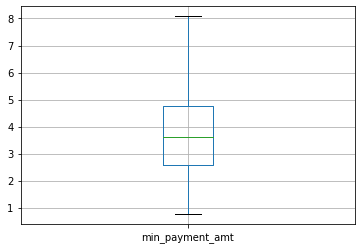

In [16]:
df.boxplot(column=['min_payment_amt'])
plt.show()

In [17]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [18]:
df[df.isnull().sum().index].dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

Univariate Analysis

<AxesSubplot:xlabel='spending', ylabel='Density'>

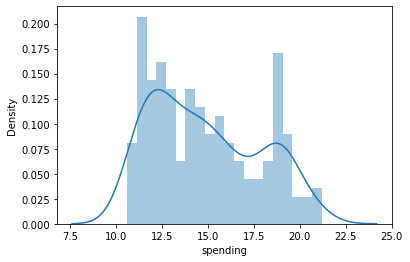

In [19]:
sns.distplot(df.spending,bins=20) 

<AxesSubplot:xlabel='advance_payments', ylabel='Density'>

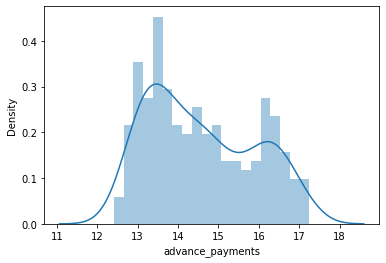

In [20]:
sns.distplot(df.advance_payments,bins=20) 

<AxesSubplot:xlabel='probability_of_full_payment', ylabel='Density'>

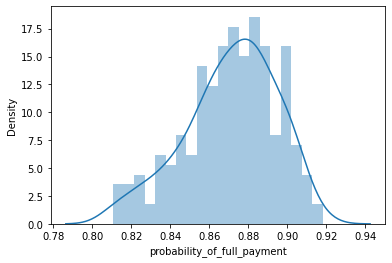

In [21]:
sns.distplot(df.probability_of_full_payment,bins=20)

<AxesSubplot:xlabel='current_balance', ylabel='Density'>

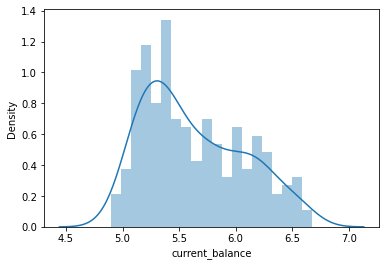

In [22]:
sns.distplot(df.current_balance,bins=20)

<AxesSubplot:xlabel='credit_limit', ylabel='Density'>

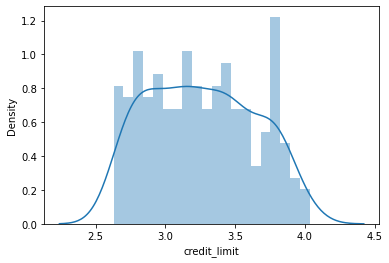

In [23]:
sns.distplot(df.credit_limit,bins=20)

<AxesSubplot:xlabel='min_payment_amt', ylabel='Density'>

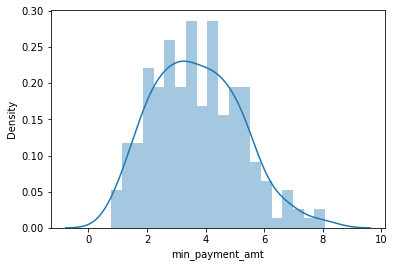

In [24]:
sns.distplot(df.min_payment_amt,bins=20)

<AxesSubplot:xlabel='max_spent_in_single_shopping', ylabel='Density'>

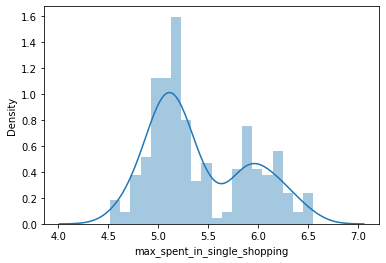

In [25]:
sns.distplot(df.max_spent_in_single_shopping,bins=20)

In [26]:
print("skewness of spending is",df['spending'].skew())
print("kurtosis of spending is ", df['spending'].kurtosis())

skewness of spending is 0.3998891917177586
kurtosis of spending is  -1.084265946732132


Skewness assesses the extent to which a variable’s distribution is symmetrical

Kurtosis is a measure of whether the distribution is too peaked

Bivariate Analysis

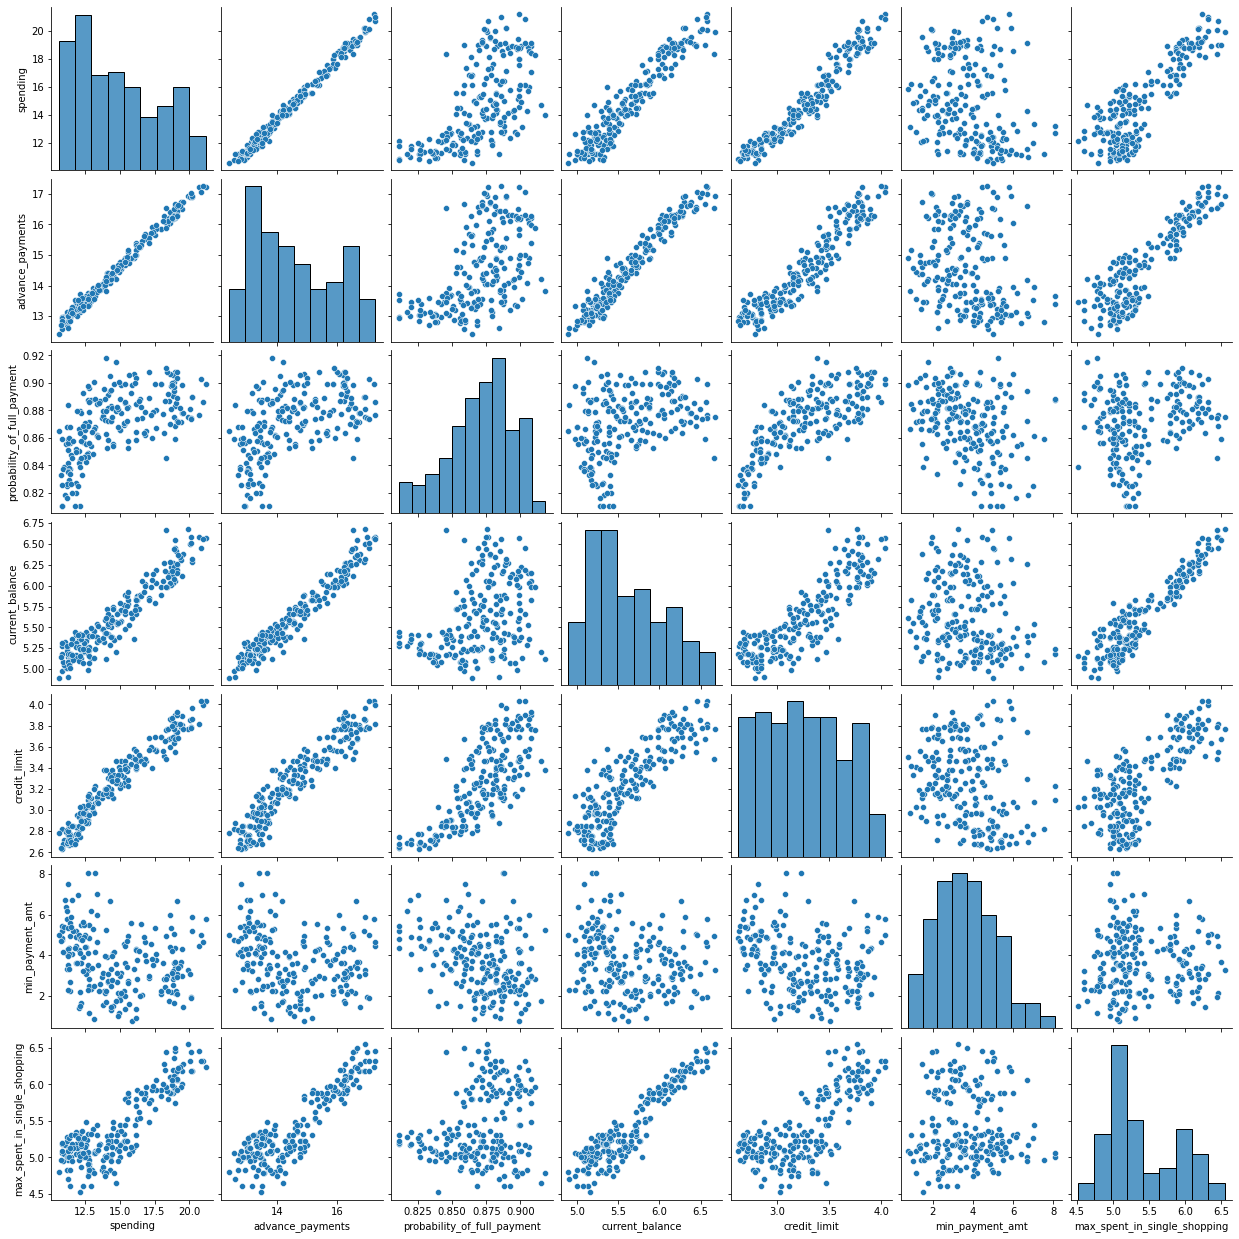

In [27]:
sns.pairplot(df)
plt.show()

In [28]:
df.corr()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608900,0.949985,0.970771,-0.229619,0.863693
advance_payments,0.994341,1.000000,0.529925,0.972422,0.944829,-0.217051,0.890784
probability_of_full_payment,0.608900,0.529925,1.000000,0.368419,0.762218,-0.335071,0.227140
current_balance,0.949985,0.972422,0.368419,1.000000,0.860415,-0.170701,0.932806
credit_limit,0.970771,0.944829,0.762218,0.860415,1.000000,-0.258980,0.749131
min_payment_amt,-0.229619,-0.217051,-0.335071,-0.170701,-0.258980,1.000000,-0.009605
max_spent_in_single_shopping,0.863693,0.890784,0.227140,0.932806,0.749131,-0.009605,1.000000


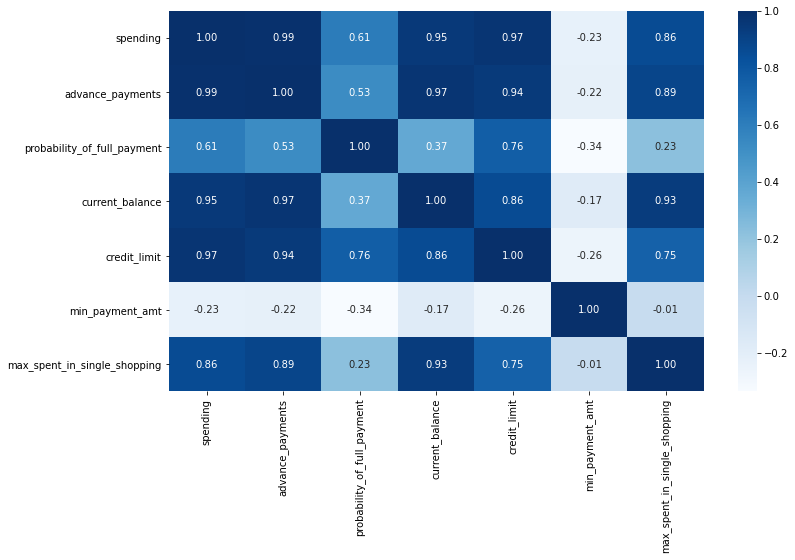

In [29]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

In [30]:
print(np.var(df))

spending                        8.426035
advance_payments                1.697407
probability_of_full_payment     0.000552
current_balance                 0.195370
credit_limit                    0.141989
min_payment_amt                 2.223457
max_spent_in_single_shopping    0.240403
dtype: float64


In [31]:
print(np.std(df))

spending                        2.902763
advance_payments                1.302846
probability_of_full_payment     0.023504
current_balance                 0.442007
credit_limit                    0.376814
min_payment_amt                 1.491126
max_spent_in_single_shopping    0.490309
dtype: float64


In [32]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

[]
['spending', 'advance_payments', 'probability_of_full_payment', 'current_balance', 'credit_limit', 'min_payment_amt', 'max_spent_in_single_shopping']


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(df)
df_scaled = scaler.transform(df)
df_scaled=pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.402032,0.444067,0.561101,0.410773,0.448043,0.400872,0.437751
std,0.274759,0.269826,0.218730,0.249473,0.269219,0.204345,0.241989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.158640,0.214876,0.429964,0.204533,0.223806,0.245594,0.258986
50%,0.355524,0.394628,0.583614,0.351633,0.432644,0.387435,0.346627
75%,0.634089,0.682851,0.716607,0.608530,0.664113,0.547356,0.668636
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


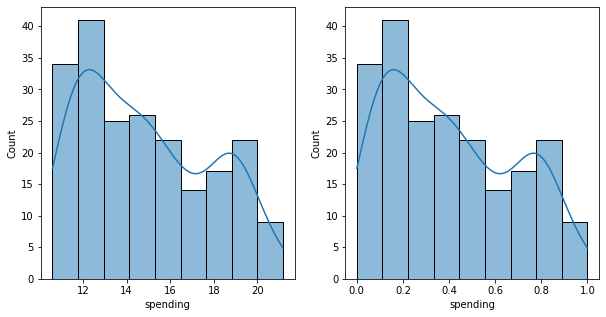

In [34]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df['spending'] , kde=True, ax=axes[0])
sns.histplot(df_scaled['spending'] , kde=True, ax=axes[1])
plt.show()

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [36]:
wardlink = linkage(df_scaled, method = 'ward')

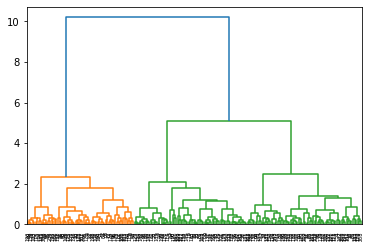

In [37]:
dend = dendrogram(wardlink)

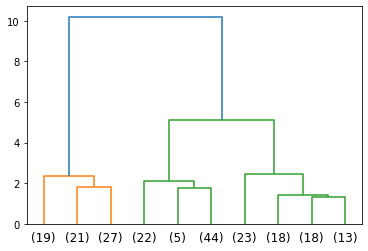

In [38]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [39]:
from scipy.cluster.hierarchy import fcluster

In [40]:
clusters_1 = fcluster(wardlink, 3, criterion='maxclust')
clusters_1

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 3, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 2, 1, 3, 2, 3, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 2, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 2, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 2, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 3, 3], dtype=int32)

In [41]:
clusters_2 = fcluster(wardlink, 4, criterion='distance')
clusters_2

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 3, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 2, 1, 3, 2, 3, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 2, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 2, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 2, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 3, 3], dtype=int32)

In [42]:
np.array_equal(clusters_1,clusters_2)

True

In [43]:
df['H_clusters'] = clusters_1

In [44]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [45]:
from sklearn.cluster import KMeans 

In [46]:
k_means = KMeans(n_clusters = 2)

In [47]:
k_means.fit(df_scaled)

KMeans(n_clusters=2)

In [48]:
k_means.labels_

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [49]:
k_means.inertia_

35.86521074048986

In [50]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_scaled)
k_means.inertia_

22.770013026036565

In [51]:
k_means = KMeans(n_clusters = 4)
k_means.fit(df_scaled)
k_means.inertia_

19.323702051792594

In [52]:
k_means = KMeans(n_clusters = 5)
k_means.fit(df_scaled)
k_means.inertia_

16.85918332844317

In [53]:
k_means = KMeans(n_clusters = 6)
k_means.fit(df_scaled)
k_means.inertia_

15.09689065256966

In [54]:
k_means = KMeans(n_clusters = 7)
k_means.fit(df_scaled)
k_means.inertia_

13.719054015544621

In [55]:
wss =[] 

In [56]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)

In [57]:
wss

[90.11520380592975,
 35.86521074048986,
 22.770013026036565,
 19.323702051792594,
 16.88519118531759,
 15.1045576826233,
 13.802943437508269,
 12.40244683471637,
 11.480004867341448,
 10.995733610492227]

In [58]:
a=[1,2,3,4,5,6,7,8,9,10]

<AxesSubplot:>

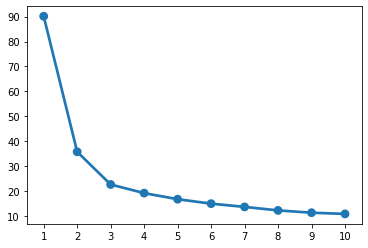

In [59]:
sns.pointplot(a, wss)

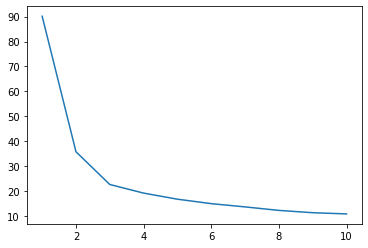

In [60]:
plt.plot(range(1,11), wss)

In [61]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_scaled)
labels = k_means.labels_

In [62]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [63]:
silhouette_score(df_scaled,labels,random_state=1)

0.41888372435617

In [64]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df_scaled)
labels_1 = k_means.labels_

In [65]:
silhouette_score(df_scaled,labels_1,random_state=1)

0.336795122525894

silhouette score is better for 3 clusters than for 4 clusters. So, final clusters will be 3

In [66]:
sil_width = silhouette_samples(df_scaled,labels)

In [67]:
df["sil_width"] = sil_width
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters,sil_width
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,0.591548
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3,0.414104
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,0.660962
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,0.523820
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,0.391219


In [68]:
silhouette_samples(df_scaled,labels)

array([0.59154771, 0.41410437, 0.6609624 , 0.52382031, 0.39121929,
       0.21284503, 0.50795236, 0.29458745, 0.53770476, 0.57420243,
       0.51657872, 0.21201579, 0.43885711, 0.55421946, 0.10820738,
       0.24547652, 0.36901891, 0.53495801, 0.0672678 , 0.30590122,
       0.4274297 , 0.32295175, 0.45933074, 0.33206455, 0.53564357,
       0.07281254, 0.10951614, 0.51043969, 0.57440355, 0.45689379,
       0.32827553, 0.50761487, 0.41590711, 0.4287596 , 0.54931171,
       0.56130348, 0.52744375, 0.44300692, 0.50692145, 0.6488829 ,
       0.59905095, 0.44176359, 0.36778887, 0.63215122, 0.52013642,
       0.46152465, 0.18837161, 0.61851864, 0.51111471, 0.56746415,
       0.36989911, 0.51610517, 0.60882459, 0.62305342, 0.64321196,
       0.13177517, 0.45432386, 0.55101354, 0.58757903, 0.59314578,
       0.55864661, 0.54892683, 0.58592355, 0.37855583, 0.47889462,
       0.59630306, 0.59315465, 0.49822166, 0.65792165, 0.24317165,
       0.37033939, 0.38166091, 0.57457901, 0.60680986, 0.23687

In [69]:
silhouette_samples(df_scaled,labels).min()

0.00820791375432051

In [70]:
df["Clus_kmeans3"] = labels
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters,sil_width,Clus_kmeans3
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,0.591548,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3,0.414104,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,0.660962,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,0.523820,0
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,0.391219,1


In [71]:
df.Clus_kmeans3.value_counts().sort_index()

0    77
1    64
2    69
Name: Clus_kmeans3, dtype: int64

In [72]:
clust_profile=df
clust_profile=clust_profile.groupby('Clus_kmeans3').mean()
clust_profile['spending']=df.Clus_kmeans3.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters,sil_width
Clus_kmeans3,,,,,,,,,
0,77,13.257662,0.849848,5.230597,2.858026,4.591601,5.086234,2.129870,0.412764
1,64,16.251719,0.884600,6.195547,3.709609,3.592094,6.056656,1.062500,0.497874
2,69,14.442029,0.882067,5.546681,3.287304,2.796858,5.165638,2.797101,0.352446


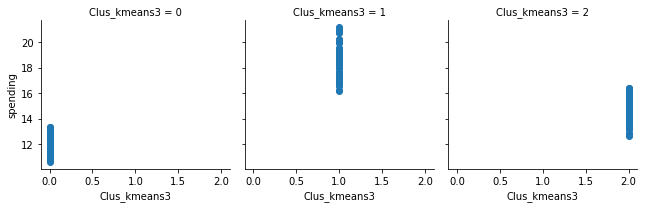

In [73]:
g = sns.FacetGrid(df, col="Clus_kmeans3", col_wrap=3, height=3)
g = g.map(plt.scatter, "Clus_kmeans3", 'spending')
g.add_legend()